<a href="https://colab.research.google.com/github/vishalmysore/AI/blob/main/examples/timeseries/FB_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas

In [2]:
!pip install prophet

In [3]:
import pandas as pd
from prophet import Prophet

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [5]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq1pkj_bl/q8hr4o5t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq1pkj_bl/4ebj6dvd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68825', 'data', 'file=/tmp/tmpq1pkj_bl/q8hr4o5t.json', 'init=/tmp/tmpq1pkj_bl/4ebj6dvd.json', 'output', 'file=/tmp/tmpq1pkj_bl/prophet_modelxsbq808s/prophet_model-20240131235108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:51:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:51:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.210097,7.487354,8.911490
3266,2017-01-16,8.535122,7.831233,9.203030
3267,2017-01-17,8.322549,7.638073,9.032738
3268,2017-01-18,8.155179,7.415646,8.902132
3269,2017-01-19,8.167136,7.501261,8.910249


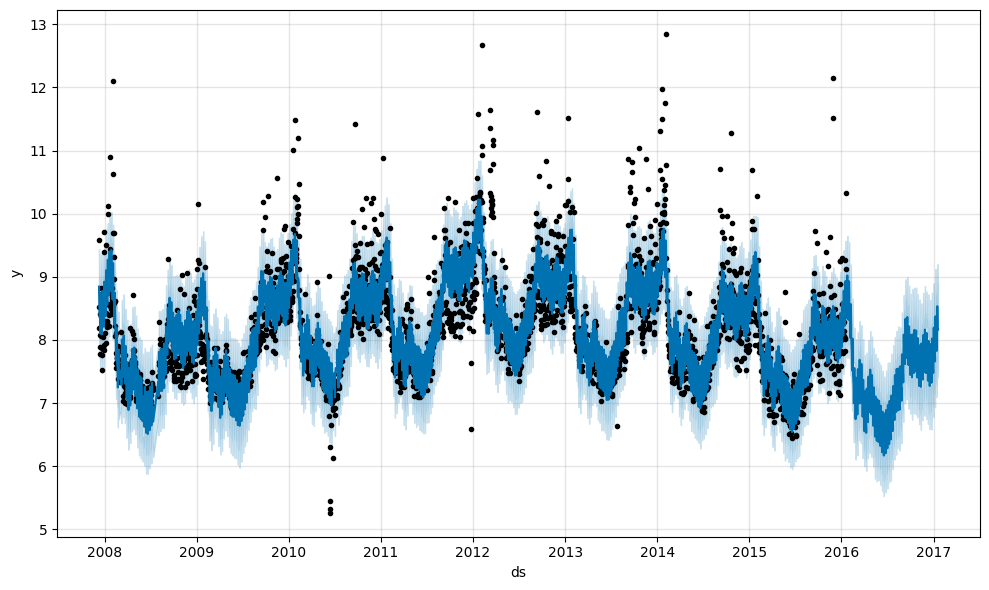

In [8]:
fig1 = m.plot(forecast)



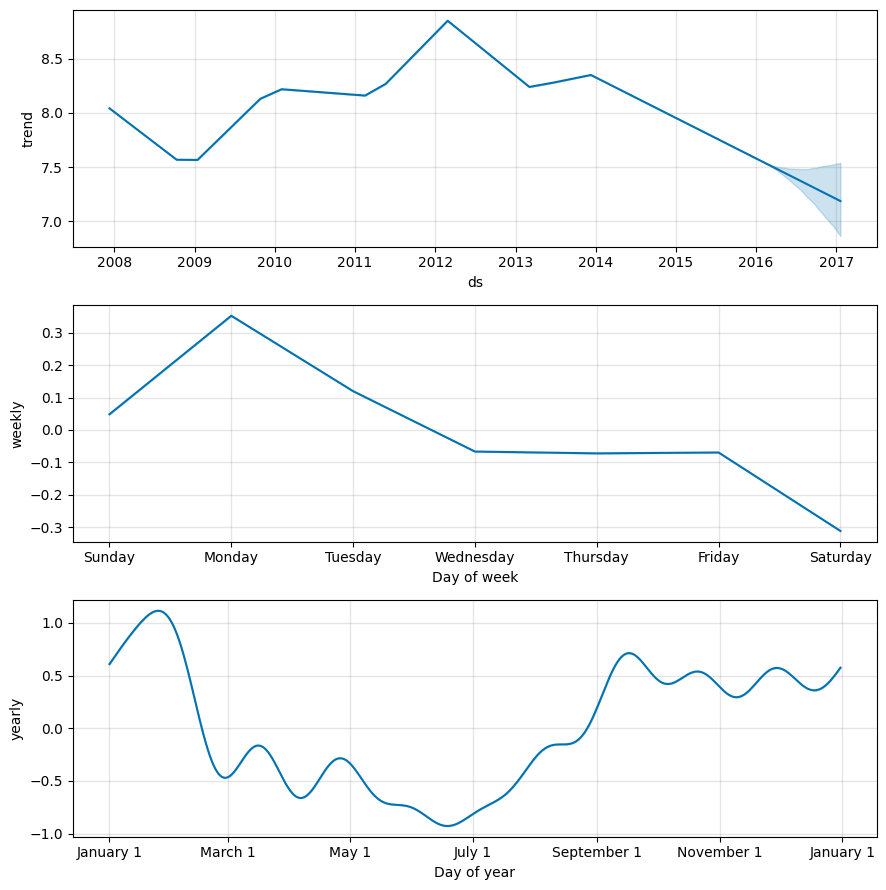

In [9]:
fig2 = m.plot_components(forecast)

